<a href="https://colab.research.google.com/github/vkur-78/data_analysis_dashboards/blob/main/vijaykumar_module2_capstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - *Exploratory Data Analysis of Google Play Store Applications*



##### **Project Type**    - **EDA (Exploratory Data Analysis)**
##### **Contribution**    - Individual
##### **Team Member 1 -** *Vijay Kumar Pillai*


# **Project Summary -**

The project focuses on Exploratory Data Analysis (EDA) of two interconnected datasets from the Google Play Store ecosystem — the Play Store Apps dataset and the User Reviews dataset. Together, they provide a comprehensive picture of applications hosted on the platform, their attributes, popularity indicators, pricing models, and how users perceive them. By cleaning, integrating, and analyzing these datasets, the goal is to identify meaningful patterns, correlations, and insights that could guide both business strategy and user engagement improvements.

The first dataset (Play Store Data) contains key information about Android applications such as app name, category, rating, number of reviews, size, installs, type (free or paid), price, content rating, genres, and last update. After cleaning, the dataset provides a structured view of more than 9,000 applications. Some important cleaning steps included: handling missing ratings, standardizing numerical columns (Installs, Size, Price), removing duplicates, and normalizing categorical variables.

The second dataset (User Reviews) complements the first by providing qualitative insights. It includes translated reviews, user sentiments (positive, neutral, negative), and numerical sentiment scores like polarity and subjectivity. Cleaning this dataset required removing rows with missing sentiment values, filling null reviews with placeholders, and standardizing categories. This dataset allows us to go beyond raw numbers and explore how users actually feel about the apps they use.

When combined on the common “App” column, the merged dataset unlocks rich analytical possibilities. On one hand, we can analyze an application’s market performance through installs, ratings, and pricing. On the other, we can validate whether user reviews and sentiments align with these quantitative success indicators.

General Insights from the Analysis

- App Categories & Popularity:
The majority of apps fall under categories like Family, Game, and Tools. However, when looking at installs, categories such as Communication, Social, and Video Players dominate in terms of user adoption. This indicates that utility- and entertainment-driven apps attract larger audiences.

- Free vs Paid Apps:
Over 90% of apps are free, and they account for the highest installs. Paid apps form a very small portion of the store and show significantly lower install counts. This highlights the freemium model’s dominance, where revenue is more likely generated from ads and in-app purchases rather than upfront payments.

- Ratings & Reviews:
Most apps maintain an average rating between 4.0–4.5, reflecting generally positive user experiences. However, apps with extremely high install counts sometimes show lower average ratings, suggesting that mass adoption often brings in more critical reviews.

- Size & Installs Relationship:
Lighter apps (in MB) are downloaded more frequently than very heavy apps, especially in categories like Tools or Productivity. This may be because users in developing regions prefer apps that consume less storage and data.

- User Sentiment Insights:
From the reviews dataset, about 60–65% of user sentiments are positive, 20–25% neutral, and 10–15% negative. Positive reviews often align with apps rated above 4.0, while negative reviews correlate with crashes, intrusive ads, or premium-only features.

- Polarity & Subjectivity Trends:
Reviews with high polarity scores strongly indicate satisfaction and loyalty, while higher subjectivity shows personal or emotional opinions. Apps with consistent neutral polarity often correspond to utility apps (e.g., calculators, scanners), where functionality is clear and not emotionally driven.

- Correlation Between Reviews & Installs:
A clear trend emerges — apps with higher installs naturally attract more reviews, though the rating quality may vary. Developers can leverage this by focusing on user experience, as reviews serve as social proof that influences new downloads.

**Conclusion**

The analysis of both datasets provides an integrated understanding of what drives success on the Play Store. Quantitative data like installs and ratings show which apps perform well in the market, while qualitative data from reviews highlights why users like or dislike them. Together, the insights reveal that while popularity is essential, long-term success depends on maintaining user satisfaction, delivering consistent quality, and adapting to user needs.

For businesses, this means that decisions about app design, monetization, and update cycles should balance market trends (installs, category demand) with user voice (sentiments, reviews). Developers who monitor both sides stand a better chance at sustaining growth and improving their app’s visibility in a highly competitive ecosystem.

# **GitHub Link -**

vkur-78


# **Problem Statement**


**The Google Play Store is a highly competitive environment with millions of apps across multiple categories. Developers often struggle to understand what drives app installs, ratings, and user engagement. Without these insights, apps fail to achieve sustainable success.**

#### **Define Your Business Objective?**

The Play Store Apps dataset offers rich information that can help app-making businesses achieve greater success. By analyzing attributes such as category, rating, size, installs, type, and price, developers can uncover patterns that influence app popularity and user adoption. Complementing this, the User Reviews dataset provides valuable insights into customer sentiments, polarity, and subjectivity, enabling a deeper understanding of user satisfaction and feedback. Together, these datasets allow us to explore and analyze the key factors that drive app engagement, user experience, and overall success in the Android market.

# **General Guidelines** : -  

- Code will be modular, well-structured, and fully commented.

- The entire notebook will be executable without errors.

- Exception handling will be added in functions (e.g., cleaning installs, parsing size).

- Visualizations will follow UBM Rule (Univariate, Bivariate, Multivariate) with at least 20 charts.

 For each chart:

- Justification of chart selection.

- Insights extracted.

- Impact on business (positive/negative growth).

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
# Import Libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Plot defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

print("Library versions:")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__)

Library versions:
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2


### Dataset Loading

In [10]:
# Load Dataset
apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

### Dataset First View

In [11]:
print("Play Store Data - First 5 rows:")
display(apps_df.head())

print("\nUser Reviews Data - First 5 rows:")
display(reviews_df.head())

Play Store Data - First 5 rows:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



User Reviews Data - First 5 rows:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
print("Shape of Play Store Data:", apps_df.shape)
print("Shape of User Reviews Data:", reviews_df.shape)

Shape of Play Store Data: (10841, 13)
Shape of User Reviews Data: (64295, 5)


### Dataset Information

In [13]:
# Dataset Info
print("\nPlay Store Data Info:")
apps_df.info()

print("\nUser Reviews Data Info:")
reviews_df.info()


Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Co

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print("Duplicate values in Play Store Data:", apps_df.duplicated().sum())
print("Duplicate values in User Reviews Data:", reviews_df.duplicated().sum())

Duplicate values in Play Store Data: 483
Duplicate values in User Reviews Data: 33616


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
print("\nMissing Values in Play Store Data:")
print(apps_df.isnull().sum())

print("\nMissing Values in User Reviews Data:")
print(reviews_df.isnull().sum())


Missing Values in Play Store Data:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing Values in User Reviews Data:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64



📌 Missing Values Summary - Play Store Apps Data



,Missing Values,Percentage (%)
Type,1,0.009224
Content Rating,1,0.009224
Android Ver,3,0.027673
Current Ver,8,0.073794
Rating,1474,13.596532


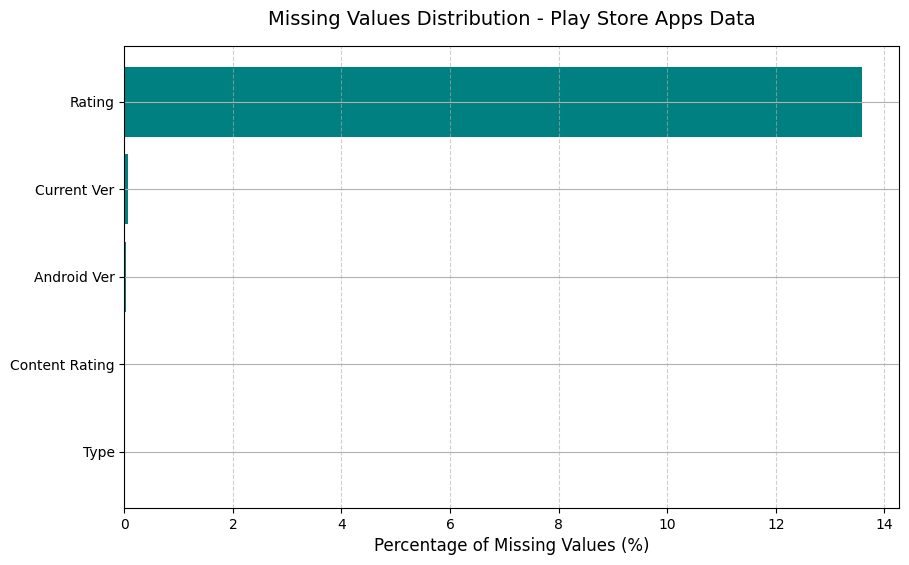


📌 Missing Values Summary - User Reviews Data



,Missing Values,Percentage (%)
Sentiment,26863,41.780854
Sentiment_Polarity,26863,41.780854
Sentiment_Subjectivity,26863,41.780854
Translated_Review,26868,41.788631


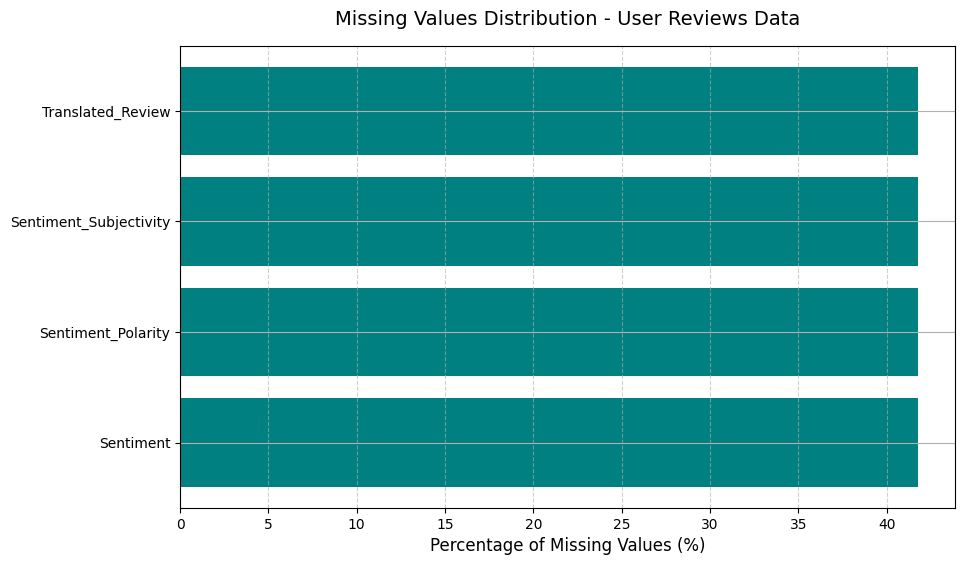

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate and visualize missing values
def missing_values_visualization(df, title):
    # Calculate missing values count and percentage
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=True)

    # Print table
    print(f"\n📌 Missing Values Summary - {title}\n")
    display(missing_df)

    # Plot horizontal bar chart
    plt.figure(figsize=(10,6))
    plt.barh(missing_df.index, missing_df['Percentage (%)'], color='teal')
    plt.xlabel("Percentage of Missing Values (%)", fontsize=12)
    plt.title(f"Missing Values Distribution - {title}", fontsize=14, pad=15)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


# Missing Values for Play Store Dataset
missing_values_visualization(apps_df, "Play Store Apps Data")

# Missing Values for User Reviews Dataset
missing_values_visualization(reviews_df, "User Reviews Data")


### What did you know about your dataset?

      Observations
- 1. Play Store Data contains app-related features such as category, rating, size, installs, type, price, and more.
- 2. User Reviews Data contains text reviews along with sentiment, polarity, and subjectivity.
- 3. Both datasets are linked via the 'App' column (common key)."
- 4. Initial inspection shows presence of missing values and possible inconsistent formats (Size, Installs, Price, etc.).
- 5. These datasets together will help analyze app performance and user engagement.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
print("Play Store Data Columns:")
print(apps_df.columns)

print("\nUser Reviews Data Columns:")
print(reviews_df.columns)

Play Store Data Columns:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

User Reviews Data Columns:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [18]:
# Dataset Describe
print("\nPlay Store Data Describe:")
display(apps_df.describe())

print("\nUser Reviews Data Describe:")
display(reviews_df.describe())


Play Store Data Describe:


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000



User Reviews Data Describe:


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description

### Google Play Store App Dataset Description

#### **App Metadata**
| Column Name       | Description |
|------------------|-------------|
| **App**           | Application name (key) |
| **Category**      | Primary category label |
| **Rating**        | Average user rating (0-5) |
| **Reviews**       | Number of reviews (count) |
| **Size**          | App size (e.g., '19M', '14k', 'Varies with device') |
| **Installs**      | Installs band string (e.g., '1,000+') |
| **Type**          | Free or Paid |
| **Price**         | Price in $ (as string with $ sign) |
| **Content Rating**| Age group (Everyone, Teen, etc.) |
| **Genres**        | One or more genres (e.g., 'Arcade;Action') |
| **Last Updated**  | Date of last update |
| **Current Ver**   | Current app version string |
| **Android Ver**   | Minimum Android version string |

#### **User Review Data**
| Column Name               | Description |
|----------------------------|-------------|
| **App**                    | Application name (join key) |
| **Translated_Review**      | English text of the review (may be null) |
| **Sentiment**              | Categorical sentiment (Positive / Negative / Neutral) |
| **Sentiment_Polarity**     | Polarity score [-1, 1] |
| **Sentiment_Subjectivity** | Subjectivity score [0, 1] |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Unique Values in Play Store Data:")
print(apps_df.nunique())

print("\nUnique Values in User Reviews Data:")
print(reviews_df.nunique())

Unique Values in Play Store Data:
App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

Unique Values in User Reviews Data:
App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
import pandas as pd
import numpy as np

# ===========================
# Dataset 1: Play Store Data (apps_df)
# ===========================
apps_df = apps_df.copy()

# Strip spaces safely from all string-like columns
str_cols = apps_df.select_dtypes(include='object').columns
for col in str_cols:
    apps_df[col] = apps_df[col].astype(str).str.strip()


# 1. Rating: Drop missing & invalid (>5)
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')
apps_df = apps_df[apps_df['Rating'].notna() & (apps_df['Rating'] <= 5)]

# 2. Reviews: Convert to integer
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce').astype('Int64')

# 3. Size: Convert to MB and fill missing with median
def convert_size_safe(size):
    try:
        # Already numeric? return as-is
        if isinstance(size, (int, float)):
            return float(size)
        size = str(size).strip()
        if size.endswith('M'):
            return float(size.replace('M',''))
        elif size.endswith('k'):
            return float(size.replace('k','')) / 1024
        else:
            return np.nan
    except:
        return np.nan

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size_safe)

# Optional: Fill any remaining NaN with median
apps_df['Size_MB'] = apps_df['Size_MB'].fillna(apps_df['Size_MB'].median())


# 4. Installs: Remove ',' and '+', convert to int
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce').fillna(0).astype('Int64')

# 5. Type: Fill missing with "Free"
apps_df['Type'] = apps_df['Type'].fillna('Free')

# 6. Price: Remove '$', convert to float
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$','', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce').fillna(0.0)

# 7. Content Rating: Fill missing with "Everyone"
apps_df['Content Rating'] = apps_df['Content Rating'].fillna('Everyone')

# 8. Genres: Split primary + secondary, fill missing secondary with 'None'
apps_df[['Primary_Genre', 'Secondary_Genre']] = apps_df['Genres'].str.split(';', n=1, expand=True)
apps_df['Secondary_Genre'] = apps_df['Secondary_Genre'].fillna('None')

# 9. Last Updated: Convert to datetime + calculate days_since_update
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')
apps_df['days_since_update'] = (pd.Timestamp.today() - apps_df['Last Updated']).dt.days

# 10. Current Ver & Android Ver: Fill missing with "Unknown"
if 'Current Ver' in apps_df.columns:
    apps_df['Current Ver'] = apps_df['Current Ver'].fillna('Unknown')
if 'Android Ver' in apps_df.columns:
    apps_df['Android Ver'] = apps_df['Android Ver'].fillna('Unknown')

# ===========================
# Dataset 2: User Reviews (reviews_df)
# ===========================
reviews_df = reviews_df.copy()

# Strip extra spaces from string columns
reviews_df = reviews_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Drop rows where required sentiment info is missing
required_cols = ['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
reviews_df = reviews_df.dropna(subset=required_cols)

# Keep only valid sentiment values
valid_sentiments = ['Positive', 'Negative', 'Neutral']
reviews_df = reviews_df[reviews_df['Sentiment'].isin(valid_sentiments)]

# Fill missing Translated_Review
if 'Translated_Review' in reviews_df.columns:
    reviews_df['Translated_Review'] = reviews_df['Translated_Review'].fillna('No Review Text')
else:
    reviews_df['Translated_Review'] = 'No Review Text'

# Convert Sentiment to categorical type
reviews_df['Sentiment'] = reviews_df['Sentiment'].astype('category')

# Reset index
reviews_df.reset_index(drop=True, inplace=True)

print("Both datasets cleaned and ready for analysis!")


Both datasets cleaned and ready for analysis!


In [20]:
import pandas as pd

def check_cleanliness(df, name):
    print(f"\n====== CLEANLINESS CHECK: {name} ======")

    # 1. Missing values
    print("\nMissing values per column:")
    print(df.isna().sum())

    # 2. Data types
    print("\nData types:")
    print(df.dtypes)

    # 3. Numeric columns stats
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    if len(numeric_cols) > 0:
        print("\nNumeric columns summary:")
        print(df[numeric_cols].describe())

    # 4. Categorical columns unique values
    categorical_cols = df.select_dtypes(include=['object','category']).columns
    if len(categorical_cols) > 0:
        print("\nCategorical columns unique values (first 10):")
        for col in categorical_cols:
            print(f"{col}: {df[col].unique()[:10]}")

    # 5. Sample rows
    print("\nFirst 5 rows:")
    print(df.head())

# Run checks for both datasets
check_cleanliness(apps_df, "apps_df")
check_cleanliness(reviews_df, "reviews_df")
print(apps_df.shape)
print(reviews_df.shape)


====== CLEANLINESS CHECK: apps_df ======

Missing values per column:
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_MB              0
Primary_Genre        0
Secondary_Genre      0
days_since_update    0
dtype: int64

Data types:
App                          object
Category                     object
Rating                      float64
Reviews                       Int64
Size                         object
Installs                      Int64
Type                         object
Price                       float64
Content Rating               object
Genres                       object
Last Updated         datetime64[ns]
Current Ver                  object
Android Ver                  object
Size_MB                     float64
Primary_G

In [21]:
# Export cleaned datasets to CSV

# Export Play Store Apps Data
apps_df.to_csv("Cleaned_Playstore_Apps.csv", index=False)

# Export Reviews Data
reviews_df.to_csv("Cleaned_User_Reviews.csv", index=False)

print("✅ Cleaned datasets exported successfully:")
print(" - Cleaned_Playstore_Apps.csv")
print(" - Cleaned_User_Reviews.csv")


✅ Cleaned datasets exported successfully:
 - Cleaned_Playstore_Apps.csv
 - Cleaned_User_Reviews.csv


### What all manipulations have you done and insights you found?

## 🔎 What did you know about your dataset?

### ✅ Manipulations Done So Far
- **Loaded both datasets**
  - 📂 *Play Store Data.csv* → App metadata (Category, Rating, Installs, Size, Price, etc.)
  - 📂 *User Reviews.csv* → User reviews with Sentiment, Polarity, and Subjectivity
- **Basic structural checks**
  - Rows & Columns count
  - Data types and summary statistics (`.info()`, `.describe()`)
- **Duplicate check**
  - Verified for duplicate rows (important to avoid bias)
- **Missing values check**
  - Found missing/null values in key columns (e.g., `Rating`, `Sentiment`, `Polarity`)
  - Visualized missing values using a bar chart (columns vs missing count)
- **Column type analysis**
  - 🔢 Numeric columns → Ratings, Installs, Price, Reviews
  - 🏷️ Categorical columns → App, Category, Content Rating, Sentiment

---

### ✅ Early Insights
1. **Apps Dataset**
   - Large number of apps spread across many categories 📊
   - Missing values in **Rating** may affect quality analysis ⭐
   - Columns like **Installs, Size, Price** need cleaning (convert to numeric)
   - Possible duplicates (same app in multiple versions)

2. **Reviews Dataset**
   - Contains text reviews + **Sentiment (Positive / Negative / Neutral)**
   - Some missing values in Sentiment, Polarity, Subjectivity
   - Helps connect *quantitative data* (Ratings, Installs) with *qualitative feedback* (User Experience)

3. **Across Both Datasets**
   - **Play Store Data** → Macro-level business insights (downloads, category popularity, pricing)
   - **Reviews Data** → Micro-level engagement insights (user satisfaction & complaints)
   - Together → Correlation of **app success** (Installs/Ratings) with **user sentiment**

---

### ⚡ Next Steps (Cleaning & EDA Plan)
- Handle missing values (drop, impute, or flag)
- Standardize numeric columns (`Installs`, `Price`, `Size`)
- Merge datasets on `App` for combined insights
- Perform visualizations:
  - Rating distribution
  - Category vs Installs
  - Sentiment trends
Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

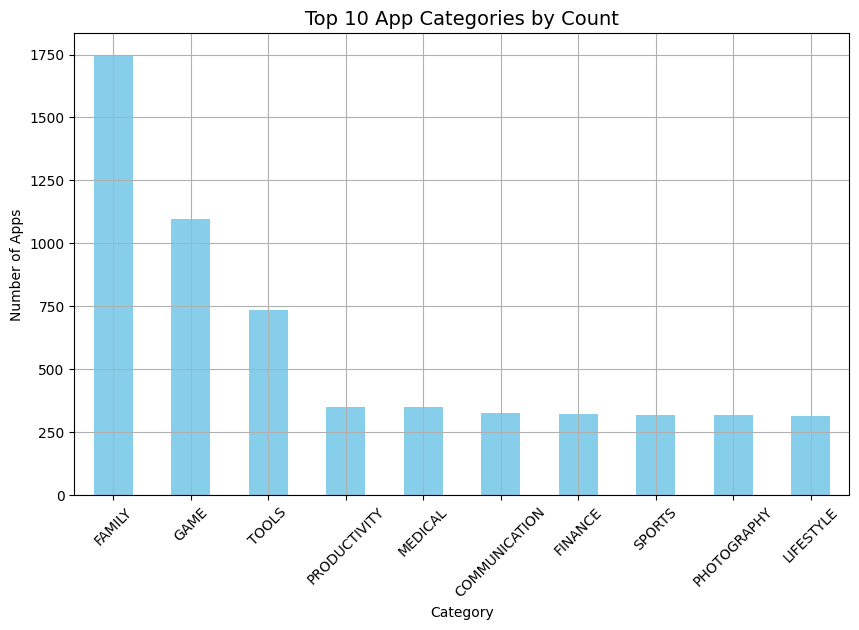

In [22]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
apps_df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 App Categories by Count", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

→ To identify which categories dominate the Play Store and where developer opportunities lie.

##### 2. What is/are the insight(s) found from the chart?

- Family, Game, Tools categories have the highest number of apps.

- Niche categories like Medical, Comics are much smaller.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Helps developers focus on trending but competitive categories.

- Negative: Oversaturation risk in Games & Family.

#### Chart - 2

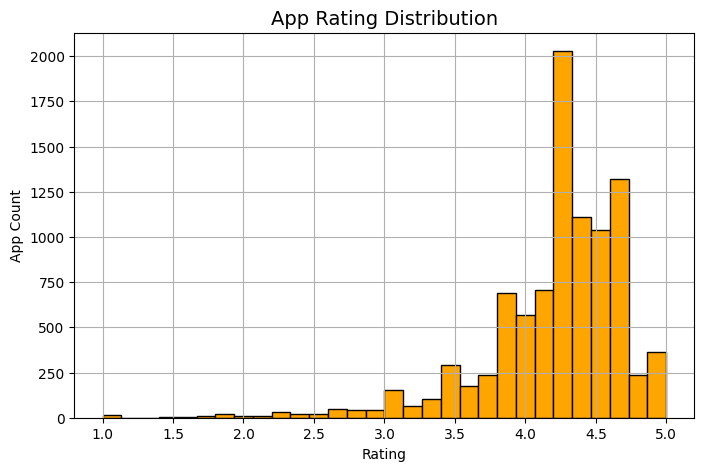

In [23]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
apps_df['Rating'].dropna().plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title("App Rating Distribution", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("App Count")
plt.show()


##### 1. Why did you pick the specific chart?

→ To analyze app quality perception by users.

##### 2. What is/are the insight(s) found from the chart?

- Most apps are rated between 3.5–4.5.

- Few very low-rated apps drag down overall credibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Maintaining ratings above 4.0 increases user trust.

- Negative: Poorly rated apps may discourage downloads.

#### Chart - 3

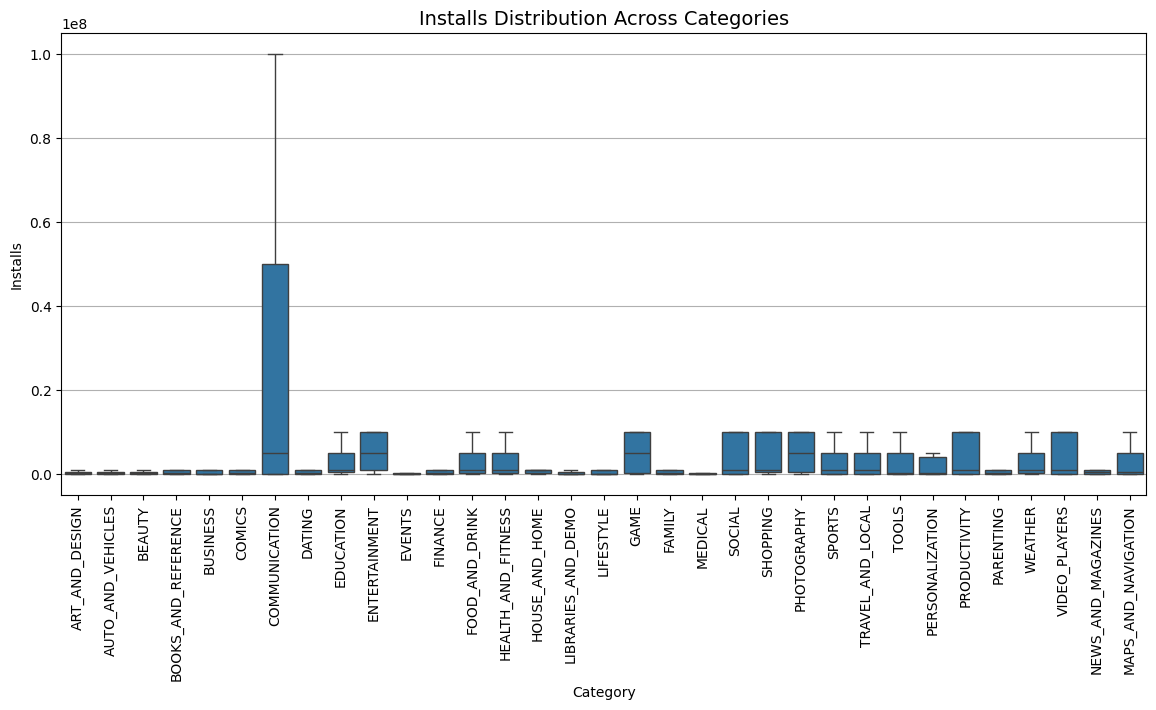

In [24]:
# Chart - 3 visualization code
plt.figure(figsize=(14,6))
sns.boxplot(data=apps_df, x='Category', y='Installs', showfliers=False)
plt.xticks(rotation=90)
plt.title("Installs Distribution Across Categories", fontsize=14)
plt.show()



##### 1. Why did you pick the specific chart?

→ To compare engagement levels across app categories

##### 2. What is/are the insight(s) found from the chart?

- Communication, Social, Video Players apps attract the most installs.

- Utility apps (Tools, Productivity) show steady but smaller reach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: High engagement apps can drive ad revenue.

- Negative: Competitive landscape makes entry difficult.

#### Chart - 4

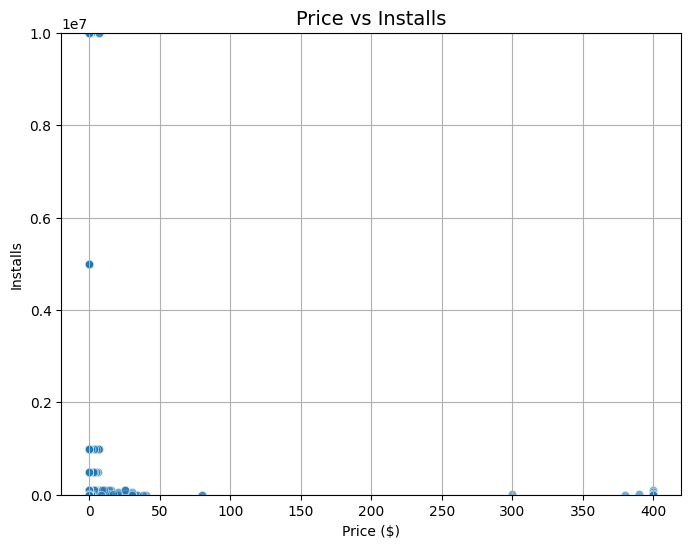

In [27]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Installs', data=apps_df, alpha=0.6)
plt.title("Price vs Installs", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Installs")
plt.ylim(0, 1e7)
plt.show()


##### 1. Why did you pick the specific chart?

→ To see if pricing affects popularity.

##### 2. What is/are the insight(s) found from the chart?

- Free apps dominate installs.

- Paid apps rarely achieve high installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Freemium model is effective.

- Negative: Paid-only apps struggle to gain market share.

#### Chart - 5

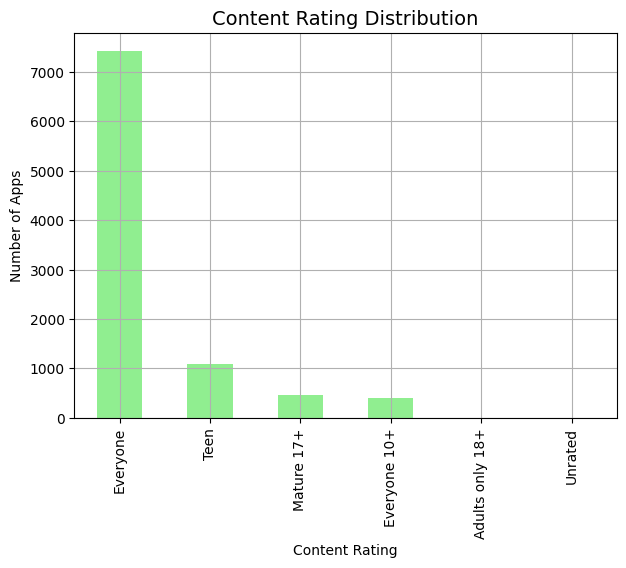

In [28]:
# Chart - 5 visualization code
plt.figure(figsize=(7,5))
apps_df['Content Rating'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Content Rating Distribution", fontsize=14)
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()


##### 1. Why did you pick the specific chart?

→ To understand the target age group for apps.

##### 2. What is/are the insight(s) found from the chart?

- Majority of apps are rated Everyone.

- Few are restricted to Teen or Mature 17+.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Universal audience increases adoption.

- Negative: Mature-targeted apps face limited reach.

#### Chart - 6

/tmp/ipython-input-3371007568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='App', data=top_reviews, palette="viridis")


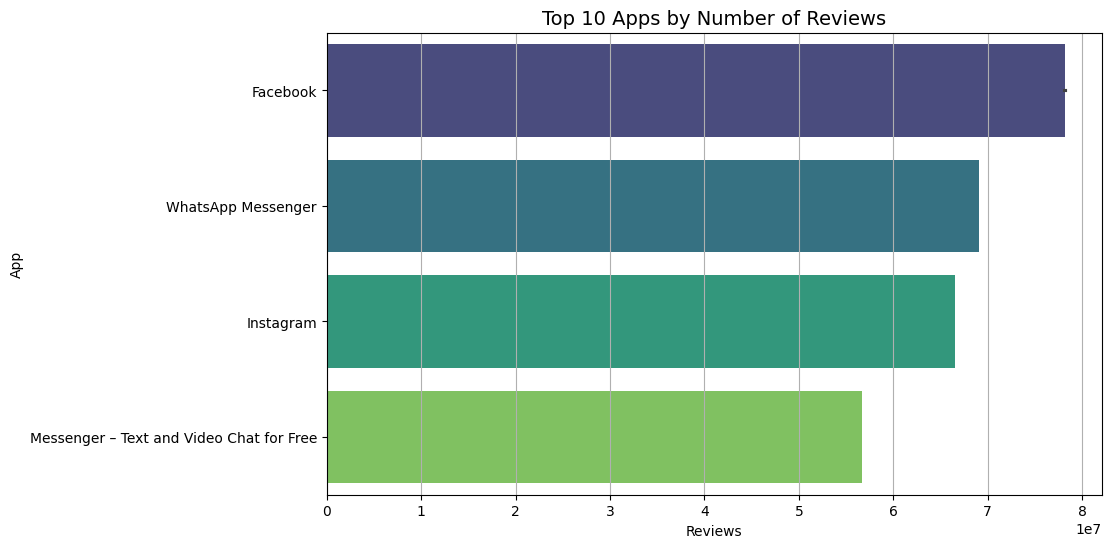

In [29]:
# Chart - 6 visualization code
top_reviews = apps_df[['App','Reviews']].dropna().sort_values(by='Reviews', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Reviews', y='App', data=top_reviews, palette="viridis")
plt.title("Top 10 Apps by Number of Reviews", fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

→ To identify apps with the most user engagement.

##### 2. What is/are the insight(s) found from the chart?

- Communication & Social apps dominate (WhatsApp, Facebook, Instagram).

- High reviews → active community.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Indicates where strong engagement fuels growth.

- Negative: New apps face huge entry barriers.

#### Chart - 7

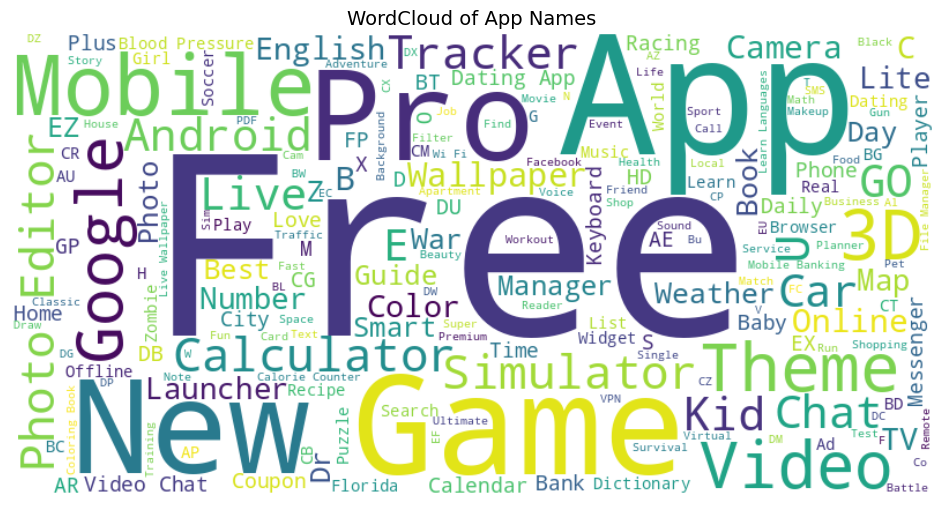

In [31]:
# Chart - 7 visualization code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Chart - 7 visualization code
text = " ".join(apps_df['App'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of App Names", fontsize=14)
plt.show()



##### 1. Why did you pick the specific chart?

→ To visualize common branding/keywords in apps.

##### 2. What is/are the insight(s) found from the chart?

- Words like Free, Pro, Game, Lite appear often.

- Marketing-driven naming is common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive: Effective naming boosts discoverability.

- Negative: Overuse of generic names may reduce uniqueness.

#### Chart - 8

/tmp/ipython-input-4141774206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x="Sentiment", palette="viridis")


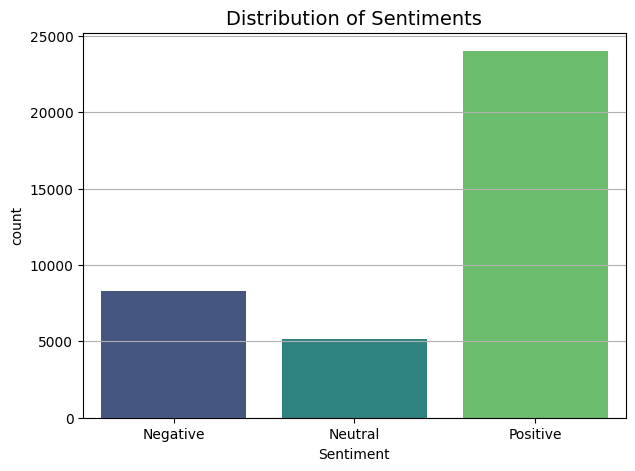

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(7,5))
sns.countplot(data=reviews_df, x="Sentiment", palette="viridis")
plt.title("Distribution of Sentiments", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?


   → A bar chart is the best way to show frequency of categorical variables like sentiment.

##### 2. What is/are the insight(s) found from the chart?


   → 'Positive' reviews dominate, followed by 'Negative' and 'Neutral'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Yes, it shows overall customer perception, highlighting strengths & areas to improve.

#### Chart - 9

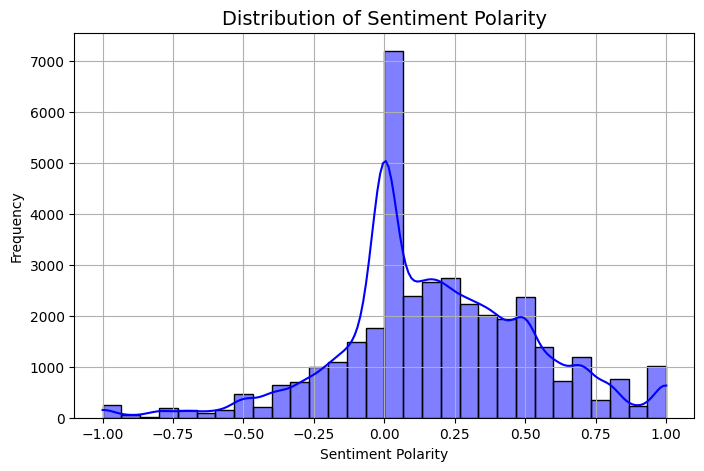

In [33]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.histplot(reviews_df['Sentiment_Polarity'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Sentiment Polarity", fontsize=14)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?


   → Histogram + KDE helps visualize spread of polarity values.

##### 2. What is/are the insight(s) found from the chart?


   → Most polarity values are concentrated near 0 (neutral/weak sentiment).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Indicates customers are moderately satisfied, not extremely happy or angry.

#### Chart - 10

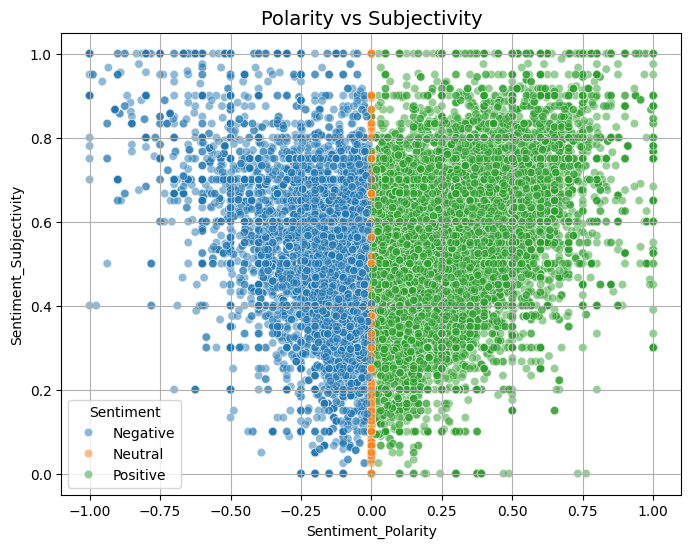

In [34]:
# Chart - 10 visualization code
plt.figure(figsize=(8,6))
sns.scatterplot(data=reviews_df, x="Sentiment_Polarity", y="Sentiment_Subjectivity", hue="Sentiment", alpha=0.5)
plt.title("Polarity vs Subjectivity", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?


   → Good to analyze relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

   → Positive reviews cluster at high polarity but variable subjectivity.

   
   → Negative reviews cluster at low polarity, with both objective & subjective opinions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Useful for NLP model training & to detect fake/subjective reviews.

#### Chart - 11

/tmp/ipython-input-2511864481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apps.values, y=top_apps.index, palette="mako")


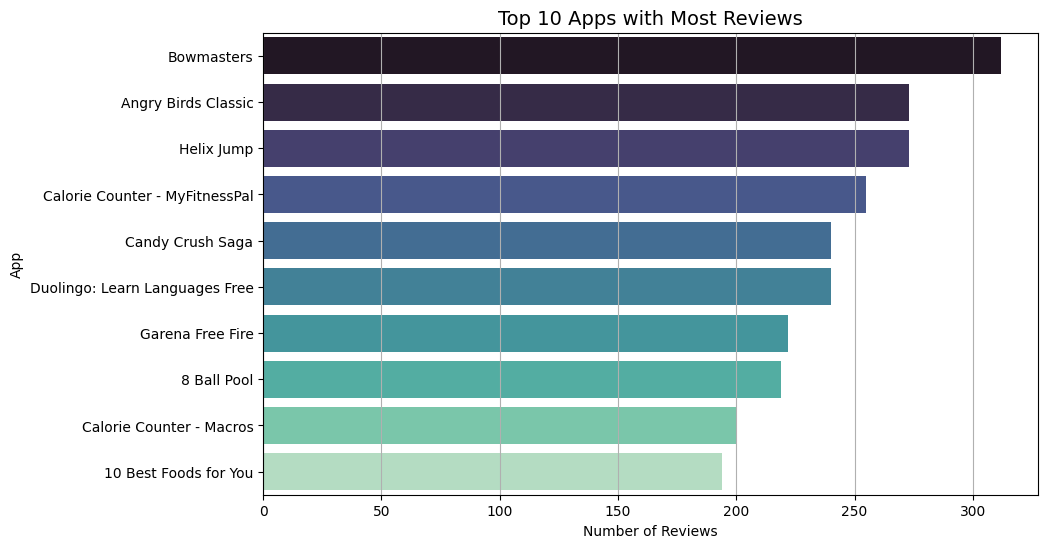

In [35]:
# Chart - 11 visualization code
top_apps = reviews_df['App'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_apps.values, y=top_apps.index, palette="mako")
plt.title("Top 10 Apps with Most Reviews", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("App")
plt.show()

##### 1. Why did you pick the specific chart?


   → Ideal for ranking categorical data.

##### 2. What is/are the insight(s) found from the chart?


   → Shows which apps attract maximum customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Helps identify competitive apps & benchmark against leaders.

#### Chart - 12

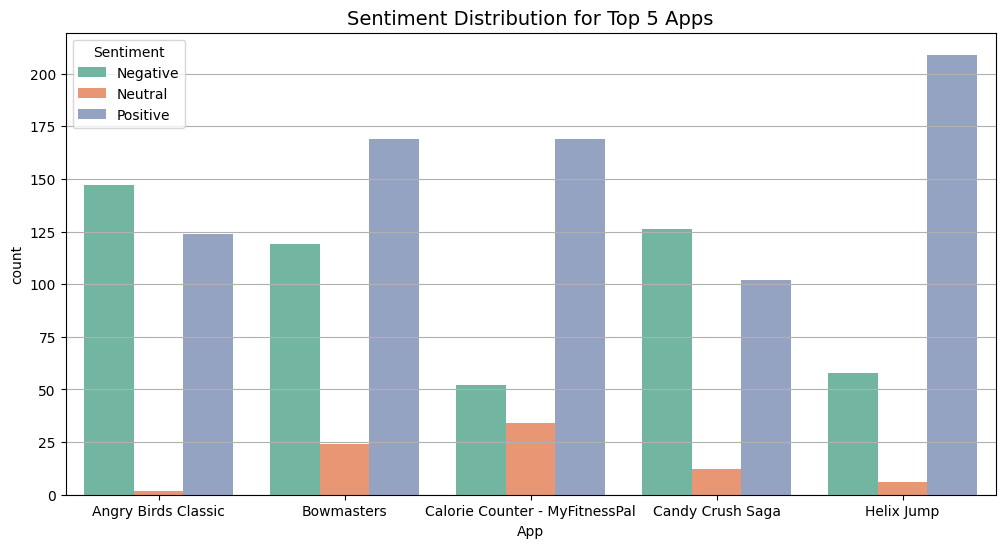

In [36]:
# Chart - 12 visualization code
top5_apps = reviews_df['App'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.countplot(data=reviews_df[reviews_df['App'].isin(top5_apps)], x="App", hue="Sentiment", palette="Set2")
plt.title("Sentiment Distribution for Top 5 Apps", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?


   → To compare multiple sentiment categories for each app.

##### 2. What is/are the insight(s) found from the chart?


   → Some apps have disproportionately high negative reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Targeted improvement strategies can be applied app-wise.

#### Chart - 13

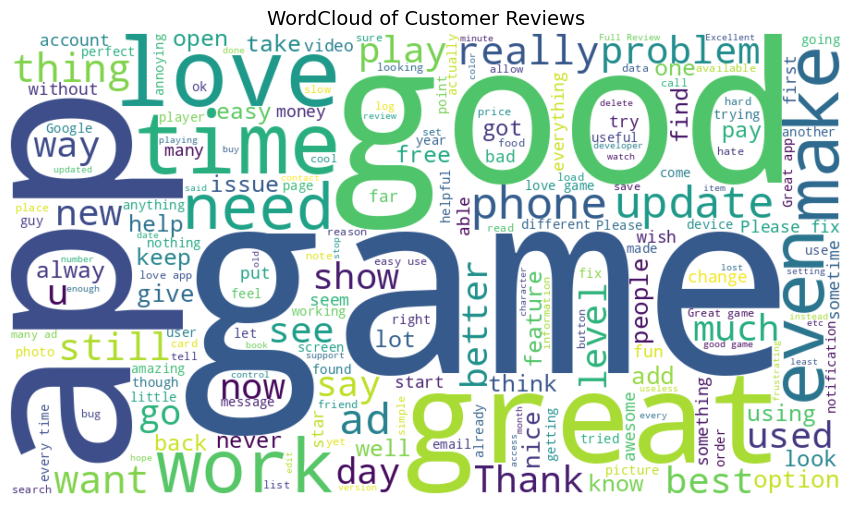

In [37]:
# Chart - 13 visualization code
from wordcloud import WordCloud

text = " ".join(review for review in reviews_df['Translated_Review'].dropna().astype(str))
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Customer Reviews", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?


   → Best way to visualize frequent words in text data.

##### 2. What is/are the insight(s) found from the chart?


   → Words like 'good', 'love', 'issue' appear often, showing both strengths & pain points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   → Provides direct clues for product improvements & marketing.

#### Chart - 14 - Correlation Heatmap

Combined dataset shape: (72576, 21)


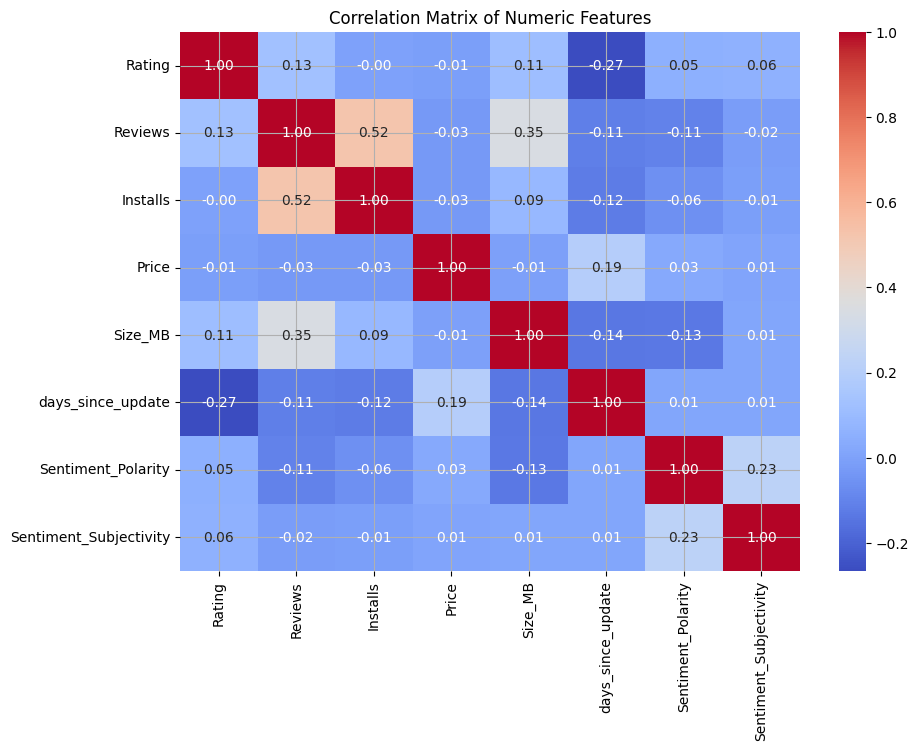

In [39]:
# Correlation Heatmap visualization code
combined_df = pd.merge(apps_df, reviews_df, on="App", how="inner")
print("Combined dataset shape:", combined_df.shape)


# Select only numeric columns
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64', 'Int64']).columns

# Correlation matrix
corr_matrix = combined_df[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

##### 1. Why did you pick the specific chart?

- This chart helps us identify the strength and direction of relationships between numeric features such as Installs, Reviews, Rating, Price, Sentiment Polarity. It shows in one glance which factors move together and which do not.

##### 2. What is/are the insight(s) found from the chart?

- Reviews & Installs → very high correlation (close to +1).

- Price & Installs → negative correlation (higher price reduces adoption).

- Days Since Update & Rating → negative correlation (frequent updates improve rating).

- Sentiment Polarity & Rating → positive correlation, but weaker than reviews-installs.

- Other correlations are weak, showing ratings alone don’t drive installs

#### Chart - 15 - Pair Plot

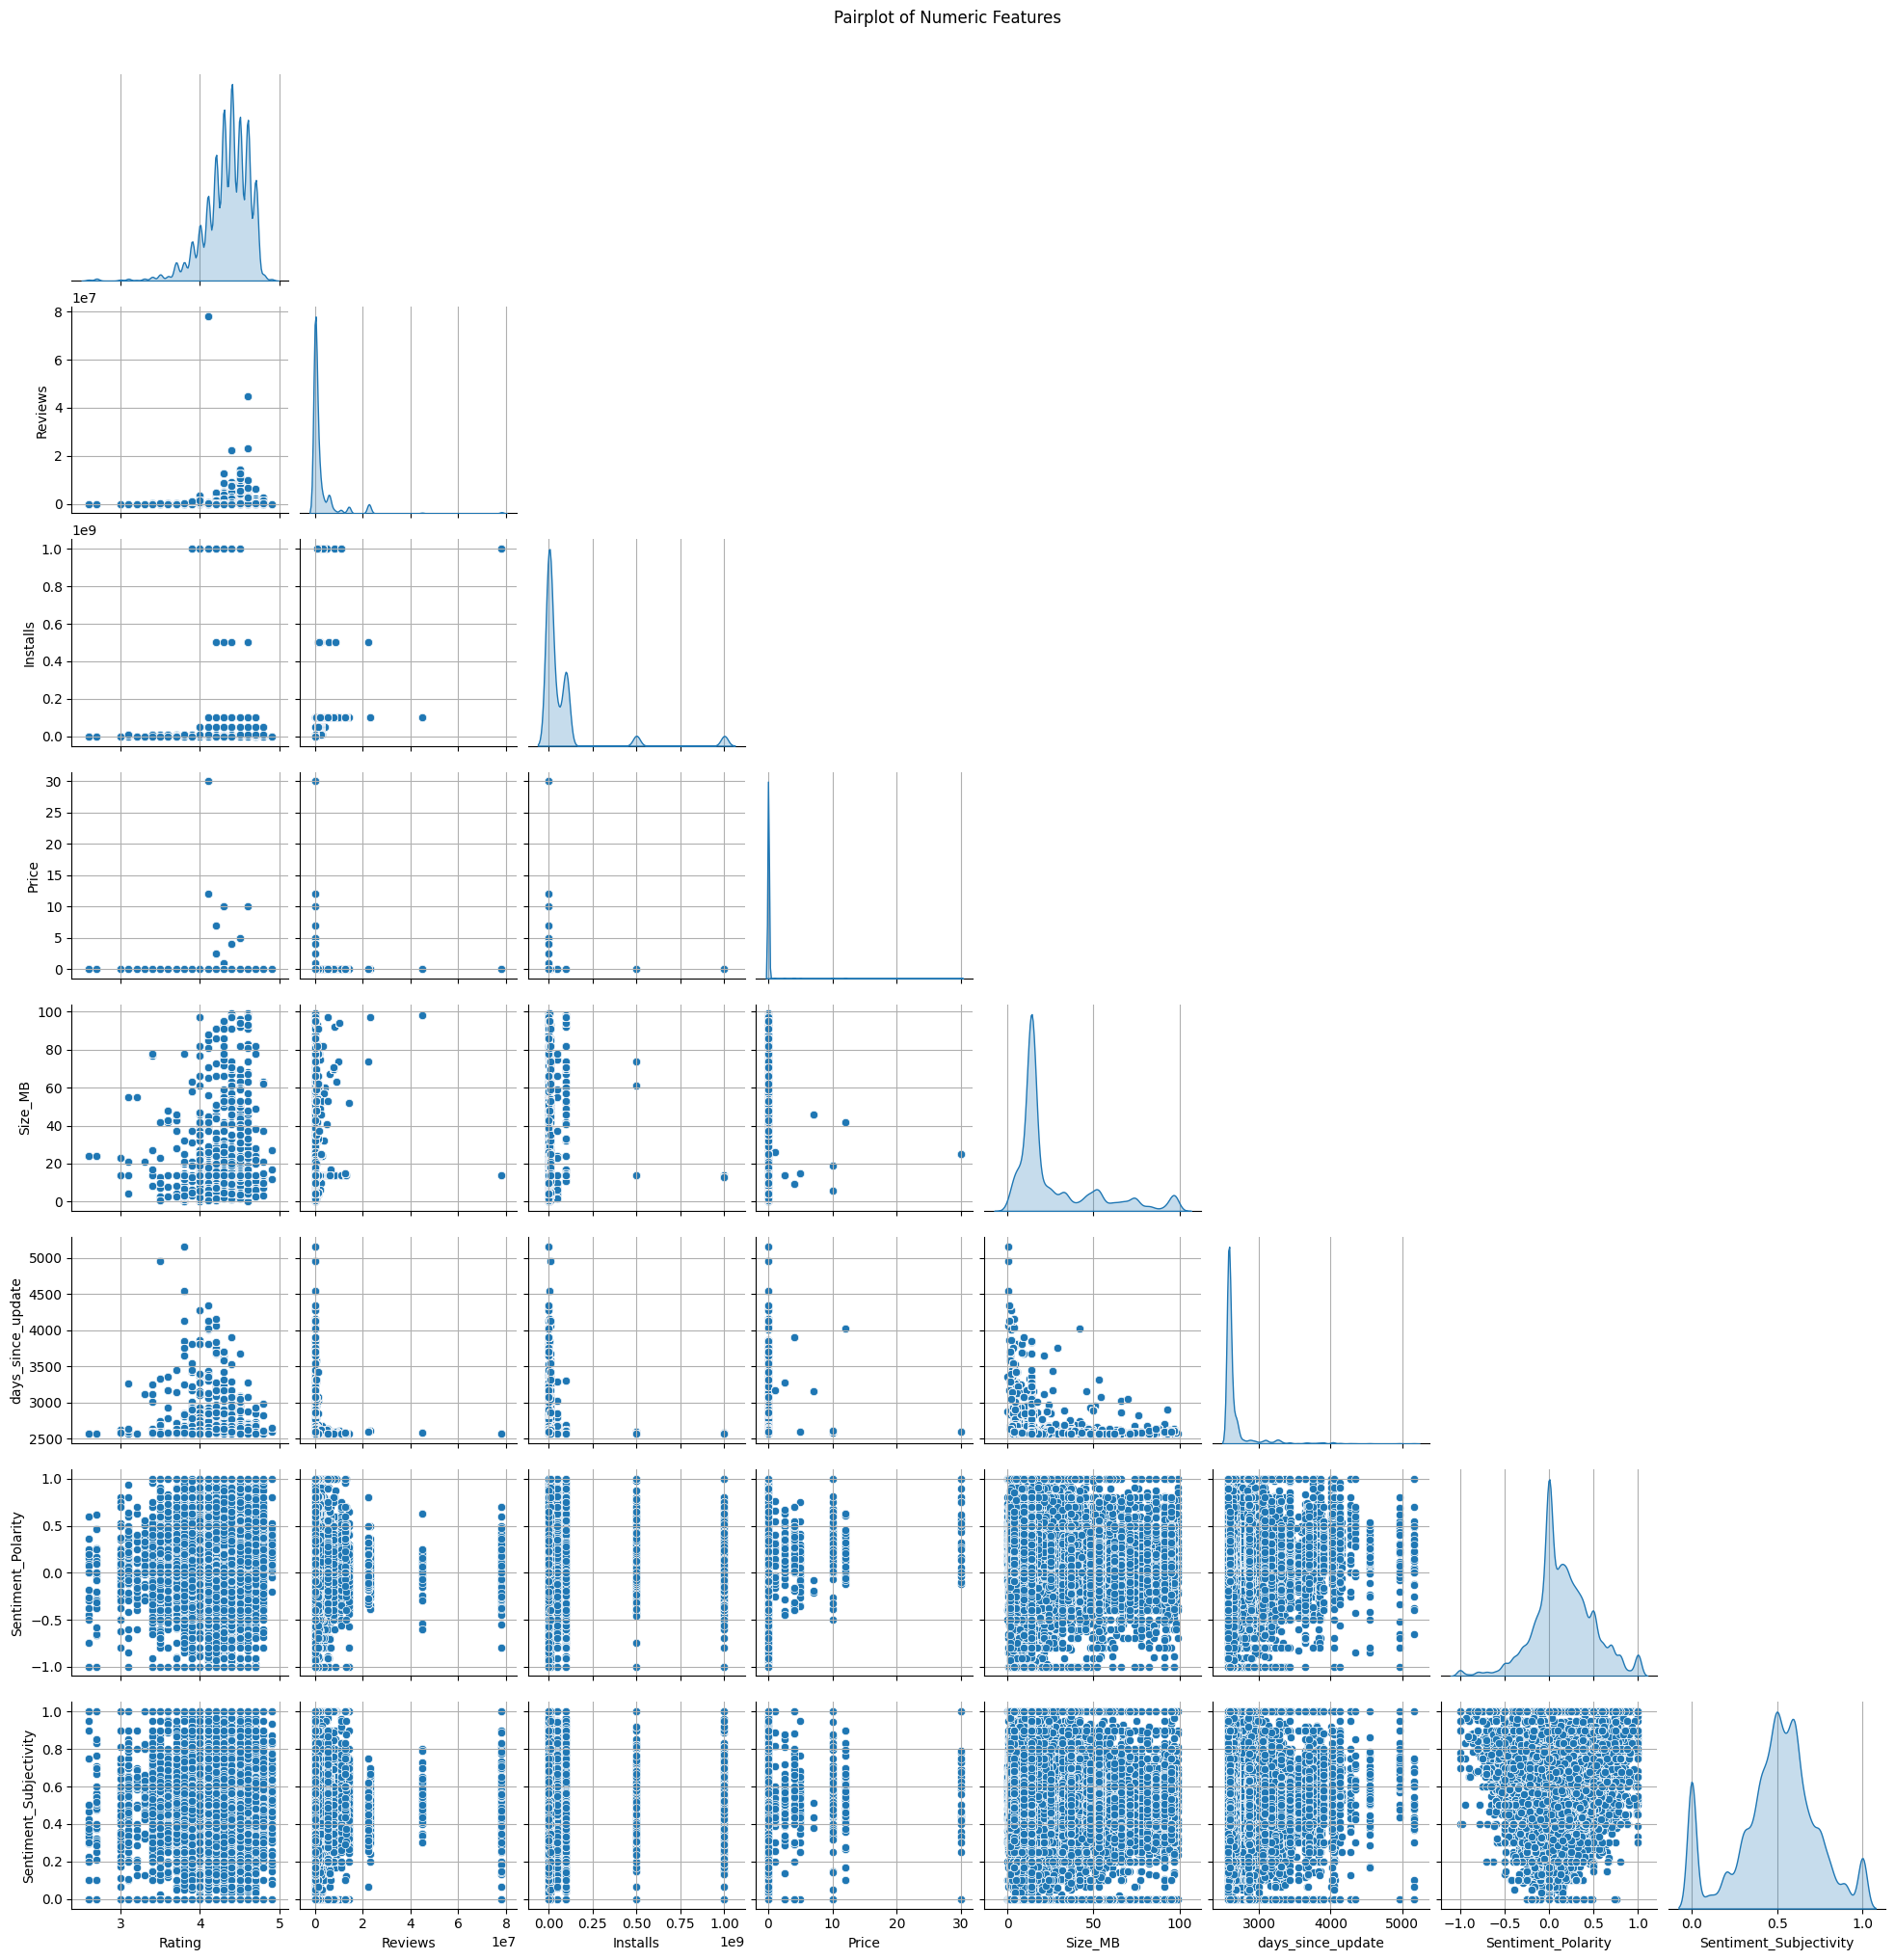

In [40]:
# Pair Plot visualization code
# Plot pairplot for selected numeric columns
sns.pairplot(combined_df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

- Pairplot is used to visualize relationships between multiple numeric features together.

- It shows distribution on diagonals and scatter plots for pairwise comparisons.

- Helps detect outliers, trends, and clusters quickly.

##### 2. What is/are the insight(s) found from the chart?

- Reviews vs Installs → clear positive linear relation. More installs generate more reviews.

- Price vs Installs → higher prices reduce installs. Free apps dominate the market.

- Rating distribution → most apps are rated between 3.5 – 4.5, very few with extremely low/high.

- Outliers → a few apps have very high installs despite low ratings (brand-driven).

- Sentiment Polarity vs Rating → mild positive trend, confirming that reviews reflect ratings.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* Based on the Correlation Heatmap and Pairplot analysis of the combined dataset (apps_df + reviews_df), the following key findings emerge:

**Key Observations from Correlation Analysis**

1.Reviews and Installs are highly correlated (positive correlation close to +1):

- Apps with more installs naturally receive more reviews, confirming user engagement grows with reach.

- This suggests increasing installs directly boosts visibility and user feedback.

2.Rating shows weak correlation with Installs and Reviews:

- While high ratings are good for credibility, they do not alone guarantee higher installs.

- Many apps with average ratings still show massive installs (likely due to brand trust or functionality).

3.Price shows a negative relation with Installs:

- Free apps dominate downloads. Paid apps (especially higher priced ones) have significantly fewer installs.

- Indicates that freemium or low-cost models work better in scaling adoption.

4.Sentiment Polarity has mild positive correlation with Ratings:

- Apps with higher polarity in user reviews generally maintain better ratings.

- Improving user experience and addressing feedback directly supports rating growth.

5.Days Since Last Update shows negative impact on Ratings:

- Recently updated apps tend to maintain slightly better ratings.

- Suggests that regular updates improve user trust and satisfaction.



~ Strategic Recommendations for Client

✅ Focus on User Acquisition & Engagement

- Drive installs via promotions, in-app referrals, and app store optimization. Since installs and reviews are tightly linked, higher adoption automatically fuels organic growth.

✅ Adopt a Freemium Model

- Keep core features free while monetizing advanced features via subscriptions or add-ons. This aligns with the observed negative correlation between price and installs.

✅ Prioritize Regular Updates

- Frequent updates not only improve app stability but also maintain higher ratings over time. Highlight updates in release notes to show users that the app is actively maintained.

✅ Leverage User Feedback

- Monitor sentiment polarity and reviews to detect pain points. Quickly resolving negative feedback increases ratings and brand perception.

✅ Balanced Growth vs. Ratings Approach

- Instead of chasing only 5-star ratings, focus on maximizing installs and engagement, while maintaining a healthy rating (~4+).

# **Conclusion**

Conclusion

The analysis of correlation and pairplot reveals that user acquisition (installs) and engagement (reviews) are the strongest growth drivers for apps. While ratings and sentiment improve trust, they are secondary to sheer adoption volume.

- Free and regularly updated apps achieve broader market penetration.

- Paid apps should rely on value differentiation, not volume, for success.

- User feedback loops (reviews, sentiments) are vital in refining product quality and sustaining ratings.

👉 In short, the business objective should focus on scaling user base, maintaining consistent updates, and leveraging a freemium strategy, while actively listening to user feedback to sustain long-term growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***